# ARMA example

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [10]:
dta = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]

In [12]:
dta.head()

,SUNACTIVITY
0,5.0
1,11.0
2,16.0
3,23.0
4,36.0


In [13]:
dta.index = pd.date_range(start='1700', end='2009', freq='A')

In [14]:
dta.head()

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0


In [17]:
res = sm.tsa.ARMA(dta, (3, 0)).fit()

In [18]:
res

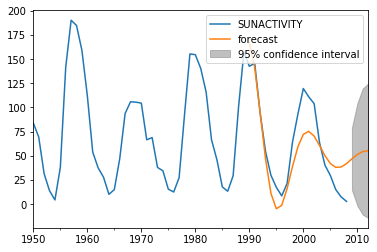

In [19]:
fig, ax = plt.subplots()
ax = dta.loc['1950':].plot(ax=ax)
fig = res.plot_predict('1990', '2012', dynamic=True, ax=ax, plot_insample=False)
plt.show()

# Streamflow ARMA

In [2]:
with open('monthly_streamflow.pickle', 'rb') as handle:
    x = pickle.load(handle)

streamflow = x.fillna(method='ffill')

In [3]:
#list(streamflow.index)

In [28]:
res = sm.tsa.ARMA(streamflow, (12, 0)).fit()

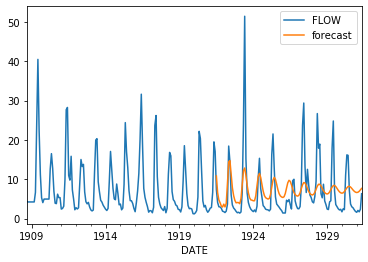

In [29]:
fig, ax = plt.subplots()
ax = streamflow.loc['1908-09-30 00:00:00':].plot(ax=ax)
fig = res.plot_predict('1921-07-31 00:00:00', '1931-05-31 00:00:00', dynamic=True, ax=ax, plot_insample=False)
plt.show()

# ARIMA streamflow

In [4]:
from statsmodels.tsa.arima_model import ARIMA

In [7]:
# train up to date in 1921
model = ARIMA(streamflow.loc[:'1921-07-31 00:00:00'], order=(12,1,0)) 
# order=(p,d,q)  = (seasonality, trend, and noise)
# p: autoregressive
# d: differencing
# q: moving average

model_fit = model.fit(disp=0)

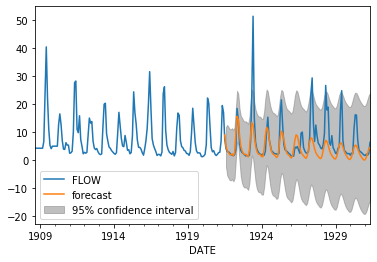

In [8]:
fig, ax = plt.subplots()
ax = streamflow.loc['1908-09-30 00:00:00':].plot(ax=ax)
fig = model_fit.plot_predict('1921-07-31 00:00:00', '1931-05-31 00:00:00', dynamic=True, ax=ax, plot_insample=False)
plt.show()

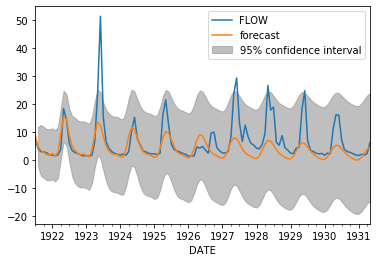

In [9]:
fig, ax = plt.subplots()
ax = streamflow.loc['1921-07-31 00:00:00':].plot(ax=ax)
fig = model_fit.plot_predict('1921-07-31 00:00:00', '1931-05-31 00:00:00', dynamic=True, ax=ax, plot_insample=False)
plt.show()

In [5]:
import plotly.plotly as py
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [6]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
#result = seasonal_decompose(data, model=’multiplicative’)
#fig = result.plot()

In [7]:
init_notebook_mode(connected=True)

In [16]:
plot_mpl(fig)

/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.

/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:451: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates

/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:390: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:487: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



'https://plot.ly/~vitoriapacela/4'

In [8]:
from pmdarima.arima import auto_arima

/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



In [22]:
stepwise_model = auto_arima(streamflow, start_p=6, start_q=1,
                           max_p=12, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(6, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1470.054, BIC=1505.661, Fit time=4.304 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1694.832, BIC=1701.953, Fit time=0.039 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1608.341, BIC=1622.583, Fit time=0.444 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1499.699, BIC=1513.942, Fit time=1.959 seconds
Fit ARIMA: order=(6, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1467.562, BIC=1506.729, Fit time=5.901 seconds
Fit ARIMA: order=(6, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=1552.862, BIC=1588.468, Fit time=4.955 seconds
Fit ARIMA: order=(6, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1464.195, BIC=1506.923, Fit time=15.815 seconds
Fit ARIMA: order=(5, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1462.189, BIC=1501.356, Fit time=13.907 seconds
Fit ARIMA: order=(5, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=1478.415, BIC=1514.022, Fit time=11.492 seconds
Fit ARIMA: order=(5, 1, 2

In [23]:
print(stepwise_model.aic())

1455.472748221025


In [12]:
train = streamflow.loc[:'1921-07-31 00:00:00']
test = streamflow.loc['1921-07-31 00:00:00':]

In [25]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 1, 2, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [26]:
len(test)

119

In [27]:
len(train)

155

In [47]:
with open('stepwise_model.pickle', 'wb') as handle:
    pickle.dump(stepwise_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [28]:
future_forecast = stepwise_model.predict(n_periods=119)

In [29]:
future_forecast

array([ 3.59986228e+00,  2.80249269e+00,  2.24788847e+00,  1.79144582e+00,
        7.50893025e-01,  4.76226926e-01,  2.96244172e-01,  1.00699518e+00,
        6.95884672e+00,  1.83623395e+01,  1.91348322e+01,  9.96883733e+00,
        4.26182057e+00,  2.96947478e+00,  2.45813638e+00,  1.65830004e+00,
        6.98451440e-01,  5.62666786e-01,  5.26797296e-01,  1.04021892e+00,
        6.59070710e+00,  1.80272132e+01,  1.75059898e+01,  8.20214881e+00,
        3.55911470e+00,  2.45194696e+00,  1.82063986e+00,  1.24122324e+00,
        2.01416225e-01, -4.87219225e-02, -1.98476435e-01,  4.62150331e-01,
        6.31557442e+00,  1.77258525e+01,  1.81852466e+01,  8.98509470e+00,
        3.53390264e+00,  2.28538719e+00,  1.74427044e+00,  9.96778466e-01,
        1.68094656e-02, -1.47392661e-01, -2.11566251e-01,  3.36539652e-01,
        5.95928236e+00,  1.73886319e+01,  1.71031544e+01,  7.82349952e+00,
        2.98466768e+00,  1.84257073e+00,  1.23219318e+00,  6.11399288e-01,
       -4.14800703e-01, -

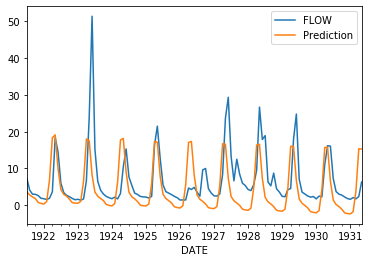

In [32]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

In [46]:
with open('future_forecast.pickle', 'wb') as handle:
    pickle.dump(future_forecast, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
with open('future_forecast.pickle', 'rb') as handle:
    future_forecast = pickle.load(handle)

In [10]:
import plotly.plotly as ply
import cufflinks as cf

In [ ]:
py.iplot([{
    'x': df.index,
    'y': df[col],
    'name': col
}

In [15]:
future_forecast = pd.DataFrame(future_forecast,index = test.index, columns=['Prediction'])
pd.concat([test, future_forecast], axis=1).iplot()

In [44]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults